In [12]:
# Import the NumPy module
import numpy as np

# Convient for outputting dictionaries
import json

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
from satsense import SatelliteImage

# Supported image formats include RGB, Quickbird and Worldview
from satsense import RGB, QUICKBIRD, WORLDVIEW2

# URI to the image
imagefile = '/home/bweel/Documents/projects/dynaslum/data/satelite/056239125010_01/056239125010_01_P001_MUL/08NOV02054348-M2AS_R1C1-056239125010_01_P001.TIF'
# Set the correct format here, it is used throughout the notebook
bands = QUICKBIRD

# Loading the file
image = SatelliteImage.load_from_file(imagefile, bands)

In [14]:
from satsense.extract import CellGenerator
from math import ceil, floor

cell_size = [25, 25]
rows, cols = image.shape[0:2]

y_cells = floor(rows / cell_size[0])
x_cells = floor(cols / cell_size[1])

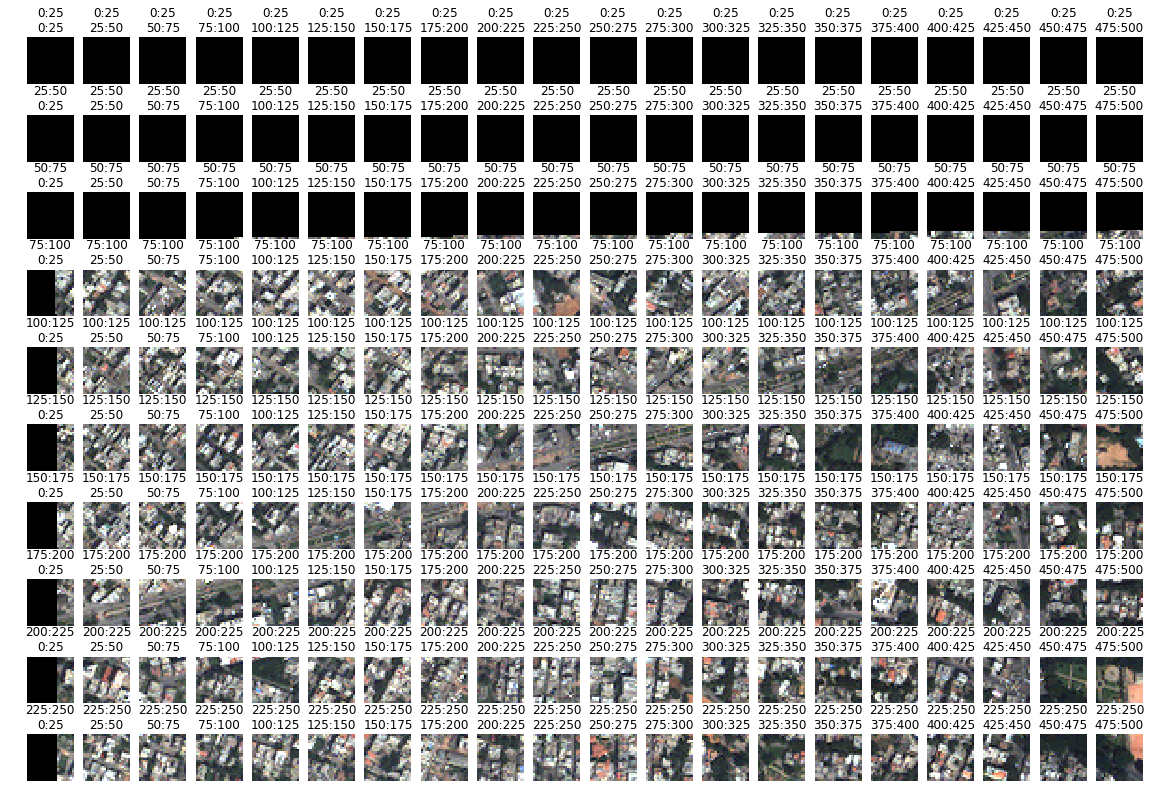

In [11]:
generator = CellGenerator(image, (25,25), length=(10, 20))
fig, axes = plt.subplots(10, 20, figsize=(20, 14), sharex=True, sharey=True)

for cell in generator:
    i = cell.x
    j = cell.y
    axes[i,j].axis('off')
    axes[i,j].imshow(cell.rgb)
    axes[i,j].set_title('{0}:{1}\n{2}:{3}'.format(cell.x_range.start, cell.x_range.stop, cell.y_range.start, cell.y_range.stop))
    axes[i,j].set_adjustable('box-forced')

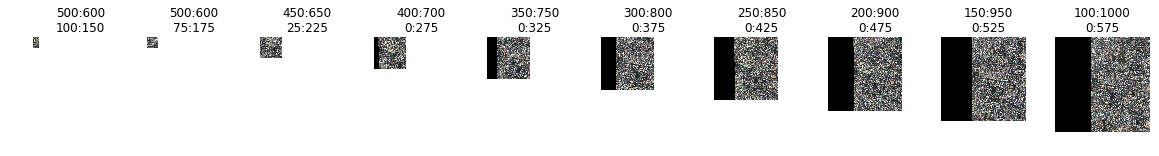

In [10]:
generator = CellGenerator(image, (100, 50), length=(10, 20))
fig, axes = plt.subplots(1, 10, figsize=(20, 12), sharex=True, sharey=True)

cell = generator.get(102)
for a in range(0,10):
    # print(i, j, x_range, y_range)
    if a > 0:
        c = cell.super_cell((100*a, 100*a))
    else:
        c = cell
    
    j = a
    x_range = c.x_range
    y_range = c.y_range
    axes[j].axis('off')
    axes[j].imshow(c.rgb)
    axes[j].set_title('{0}:{1}\n{2}:{3}'.format(x_range.start, x_range.stop, y_range.start, y_range.stop))
    axes[j].set_adjustable('box-forced')

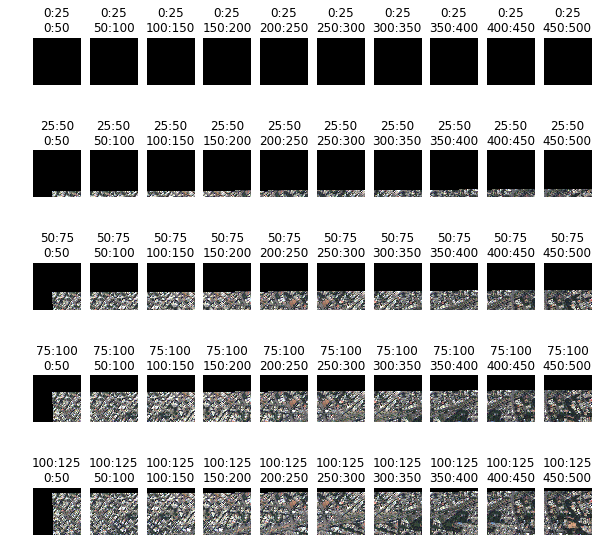

In [9]:
generator = CellGenerator(image, (25, 50), length=(5, 10))
fig, axes = plt.subplots(5, 10, figsize=(10, 10), sharex=True, sharey=True)

for cell in generator:
    i = cell.x
    j = cell.y
    c = cell.super_cell((100, 100), padding=True)
    axes[i,j].axis('off')
    axes[i,j].imshow(c.rgb)
    axes[i,j].set_title('{0}:{1}\n{2}:{3}'.format(c.x_range.start, c.x_range.stop, c.y_range.start, c.y_range.stop))
    axes[i,j].set_adjustable('box-forced')


In [4]:
import time
from dateutil.relativedelta import relativedelta


from satsense.features import Pantex, NirNDVI, HistogramOfGradients
from satsense import extract_features

features = [
    # Pantex(windows=(25,)),
    # NirNDVI(windows=(25,))
    HistogramOfGradients(windows=(25,))
    
]

t0 = time.time()
feature_set = extract_features(normalized_image, features, bands, x_length=5, y_length=10)
t1 = time.time()

difference = t1 - t0

attrs = ['years', 'months', 'days', 'hours', 'minutes', 'seconds']
human_readable = lambda delta: ['%d %s' % (getattr(delta, attr), getattr(delta, attr) > 1 and attr or attr[:-1]) 
                                for attr in attrs if getattr(delta, attr)]

print(*human_readable(relativedelta(seconds=difference)))


print(feature_set.shape)

Total length found:  5
Feature vector:
(5, 10, 5)
0 second
(5, 10, 5)


In [5]:
feature_set

array([[[  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.00000000e+00,   0.00000000e+00,   3.56400000e+02,
           9.00000000e+01,   1.25333234e-01],
        [  0.000000